# Bag of Words
Bag of Words là một cách đơn giản nhất để biểu diễn văn bản. Chúng ta coi văn bản của mình như một tập hợp các tài liệu, trong đó tài liệu có thể là bất cứ thứ gì, từ câu đơn, các chương sách, cho đến toàn bộ cuốn sách. Vì chúng ta thường so sánh các tài liệu khác nhau với nhau hoặc sử dụng chúng trong ngữ cảnh lớn hơn gồm các tài liệu khác, nên thông thường chúng ta làm việc với một tập hợp tài liệu chứ không phải chỉ một tài liệu đơn lẻ.

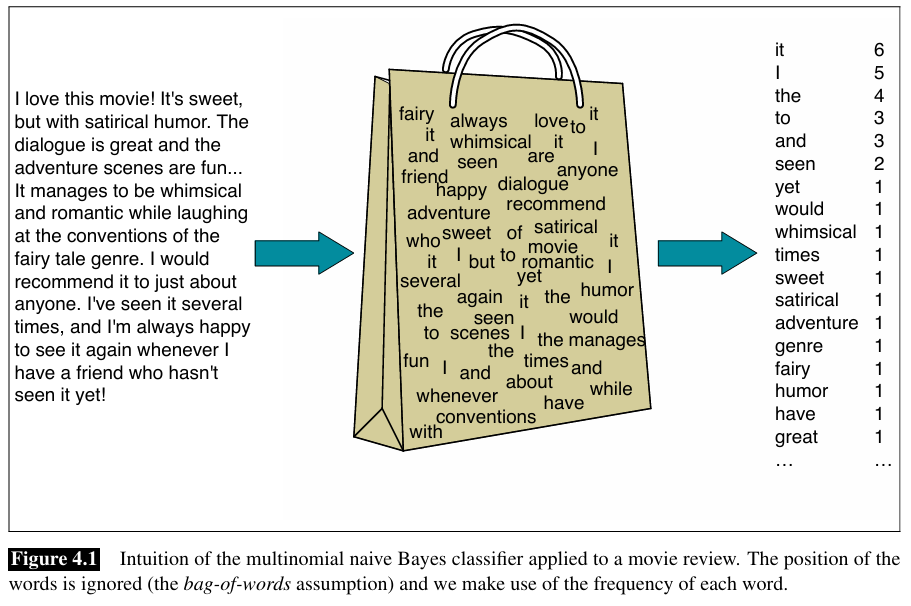

In [ ]:
%run -i "/content/drive/MyDrive/DeepLearning/util_simple_classifier.ipynb"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import sys

In [ ]:
(train_df, test_df) = load_train_test_dataset_pd()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

## CounterVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
print(X)

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


In [ ]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
vectorizer = CountVectorizer(max_df=0.4)
X = vectorizer.fit_transform(train_df["text"])
print(X)

  (0, 6578)	1
  (0, 4219)	1
  (0, 2106)	1
  (0, 8000)	2
  (0, 717)	1
  (0, 42)	1
  (0, 1280)	1
  (0, 5260)	1
  (0, 1607)	1
  (0, 7889)	1
  (0, 3630)	1
  (0, 3406)	1
  (0, 4759)	1
  (0, 7345)	1
  (0, 2707)	1
  (0, 3476)	1
  (0, 7883)	1
  (0, 487)	1
  (0, 6769)	1
  (0, 4269)	1
  (0, 1441)	1
  (0, 8405)	1
  (0, 1889)	1
  (0, 5466)	1
  (0, 7461)	1
  :	:
  (2557, 5905)	1
  (2557, 3595)	1
  (2557, 6745)	1
  (2557, 1023)	1
  (2557, 5259)	1
  (2558, 8000)	1
  (2558, 5331)	1
  (2558, 6733)	1
  (2558, 970)	1
  (2558, 4150)	1
  (2558, 874)	1
  (2559, 4219)	1
  (2559, 5128)	1
  (2559, 285)	1
  (2559, 5292)	1
  (2559, 6278)	1
  (2559, 5326)	1
  (2559, 7929)	1
  (2559, 3336)	1
  (2559, 5622)	1
  (2559, 6748)	1
  (2559, 8629)	1
  (2559, 7915)	1
  (2559, 1679)	1
  (2559, 5904)	1


In [ ]:
dense_matrix = X.todense()
print(dense_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))

['10' '100' '101' ... 'zone' 'ótimo' 'últimos']
8856


In [ ]:
print(vectorizer.stop_words)

None


In [ ]:
first_review = test_df['text'].iat[0]
print(first_review)

lovingly photographed in the manner of a golden book sprung to life , stuart little 2 manages sweetness largely without stickiness .


In [ ]:
first_review = test_df['text'].iat[0]
print(first_review)

lovingly photographed in the manner of a golden book sprung to life , stuart little 2 manages sweetness largely without stickiness .


In [ ]:
import numpy as np
sparse_vector = vectorizer.transform([first_review])
print(sparse_vector)
dense_vector = sparse_vector.todense()
np.set_printoptions(threshold=sys.maxsize)
print(dense_vector)
np.set_printoptions(threshold=False)

  (0, 6)	1
[[0 0 0 0 0 0 1 0 0]]


max_dff loat trong phạm vi [0,0, 1,0] hoặc int, mặc định=1,0 Khi xây dựng từ vựng, hãy bỏ qua các thuật ngữ có tần suất tài liệu cao hơn ngưỡng nhất định (các từ dừng dành riêng cho kho ngữ liệu). Nếu float, tham số biểu thị một tỷ lệ tài liệu, số nguyên tuyệt đối. Tham số này bị bỏ qua nếu từ vựng không phải là Không.

Loại bỏ các stop_words ra khỏi data khi lớn hơn ngưỡng. Trong CountVectorizer, tham số max_df được sử dụng để loại bỏ các từ xuất hiện trong một tỷ lệ tài liệu lớn hơn giá trị được chỉ định. Nếu max_df=0.8, nghĩa là bất kỳ từ nào xuất hiện trong hơn 80% số tài liệu sẽ bị coi là "quá phổ biến" (stop words) và bị loại bỏ khỏi ma trận từ điển.

In [ ]:
vectorizer = CountVectorizer(max_df=0.8)
X = vectorizer.fit_transform(train_df["text"])
print(X)

  (0, 7892)	2
  (0, 6580)	1
  (0, 4220)	1
  (0, 2107)	1
  (0, 8003)	2
  (0, 718)	1
  (0, 42)	1
  (0, 1281)	1
  (0, 5261)	1
  (0, 1608)	1
  (0, 369)	1
  (0, 7891)	1
  (0, 3631)	1
  (0, 3407)	1
  (0, 4760)	1
  (0, 7347)	1
  (0, 2708)	1
  (0, 3477)	1
  (0, 7885)	1
  (0, 488)	1
  (0, 6771)	1
  (0, 4270)	1
  (0, 1442)	1
  (0, 8408)	1
  (0, 1890)	1
  :	:
  (2557, 1024)	1
  (2557, 5260)	1
  (2558, 8003)	1
  (2558, 5409)	1
  (2558, 5332)	1
  (2558, 6735)	1
  (2558, 971)	1
  (2558, 4151)	1
  (2558, 875)	1
  (2559, 7892)	1
  (2559, 4220)	1
  (2559, 369)	1
  (2559, 5129)	1
  (2559, 285)	1
  (2559, 5293)	1
  (2559, 6280)	1
  (2559, 5327)	1
  (2559, 7932)	1
  (2559, 3337)	1
  (2559, 5624)	1
  (2559, 6750)	1
  (2559, 8632)	1
  (2559, 7918)	1
  (2559, 1680)	1
  (2559, 5906)	1


In [ ]:
print(vectorizer.stop_words)

None


In [ ]:
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer(stop_words=['the', 'this', 'these', 'in', 'at', 'for'])
X = vectorizer.fit_transform(train_df["text"])
vectorize = lambda x: vectorizer.transform([x]).toarray()[0]
(X_train, X_test, y_train, y_test) = create_train_test_data(train_df, test_df, vectorize,'text')
clf = train_classifier(X_train, y_train)
test_classifier(test_df, clf)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       160
           1       0.74      0.76      0.75       160

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [ ]:
X_train[0]

array([0, 0, 0, ..., 0, 0, 0])